In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# dataset
dataset=np.genfromtxt("/content/perceptron_toydata.txt", delimiter='\t')
x=dataset[:,0:2]
y=dataset[:,2]
y = y.astype(np.int32)

print("Class count : ",np.bincount(y))
print("X shape ",x.shape)
print("Y shape ",y.shape)

shuffle_idx=np.arange(y.shape[0])
print(shuffle_idx)

shuffle_rng=np.random.default_rng(42)
shuffle_rng.shuffle(shuffle_idx)

Class count :  [50 50]
X shape  (100, 2)
Y shape  (100,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [9]:
x,y=x[shuffle_idx],y[shuffle_idx]

In [10]:
print(x)
print(y)

[[ 2.61  2.92]
 [-4.09  1.03]
 [ 1.14  3.91]
 [ 0.02 -0.02]
 [-3.98 -1.05]
 [ 0.38  0.95]
 [ 3.88  0.65]
 [-1.74 -1.1 ]
 [ 2.63  0.4 ]
 [ 2.17  2.64]
 [ 0.91 -3.07]
 [-2.95 -1.16]
 [-3.96 -2.  ]
 [ 0.83  3.94]
 [ 2.95  2.09]
 [ 4.16  3.34]
 [ 0.73  2.97]
 [ 2.3   3.33]
 [-1.84 -1.13]
 [ 2.52  1.83]
 [ 1.26  3.54]
 [-1.14 -2.66]
 [-1.61 -1.28]
 [ 1.5   3.93]
 [-1.08 -1.23]
 [ 1.73  2.8 ]
 [ 0.85  1.56]
 [-2.42 -3.35]
 [ 1.26  1.17]
 [ 3.13  0.92]
 [-2.92 -2.51]
 [ 0.77 -1.14]
 [ 2.86  1.35]
 [-1.41 -0.33]
 [-5.27 -0.78]
 [-2.59 -2.21]
 [ 0.51  2.44]
 [-2.26  0.01]
 [-2.19 -1.48]
 [-2.14 -1.62]
 [ 1.36 -0.22]
 [-3.33 -0.44]
 [ 1.54  2.02]
 [-1.5   0.34]
 [ 2.58  1.79]
 [-0.33  1.44]
 [ 0.71  2.27]
 [ 3.19  2.32]
 [ 1.56  3.85]
 [-0.37 -1.91]
 [ 1.    0.46]
 [ 0.9   2.05]
 [-3.17 -3.69]
 [ 0.97  2.68]
 [-0.05 -1.95]
 [ 1.09  3.12]
 [-1.45 -2.26]
 [ 1.93  3.71]
 [-3.45 -0.61]
 [ 1.96  0.83]
 [ 2.4   0.91]
 [-1.48 -1.17]
 [-1.69  0.8 ]
 [ 3.87  2.91]
 [ 2.38  0.9 ]
 [-1.26 -2.9 ]
 [ 1.31  1

In [11]:
train_x,test_x=x[:70,:],x[70:,:]
train_y,test_y=y[:70],y[70:]


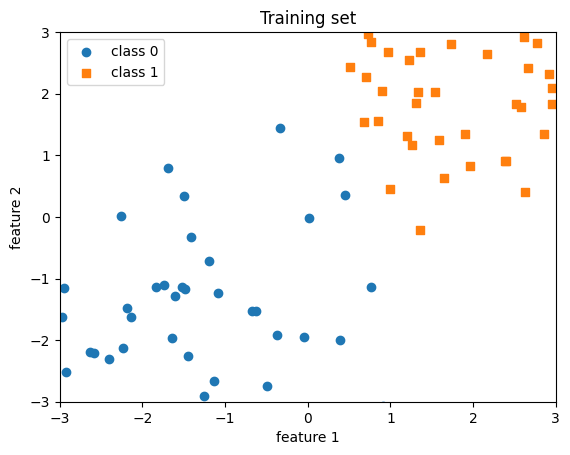

In [12]:
# visualize the data

plt.scatter(x[y==0,0],x[y==0,1],label="class 0",marker="o")
plt.scatter(x[y==1,0],x[y==1,1],label="class 1",marker="s")
plt.title("Training set")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend()
plt.show()

In [17]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype=np.float32)
        self.bias = np.zeros(1, dtype=np.float32)

    def forward(self, x):
        linear = np.dot(x, self.weights) + self.bias
        predictions = np.where(linear > 0., 1, 0)
        return predictions

    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors

    def train(self, x, y, epochs):
        for e in range(epochs):

            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors

    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy

In [19]:
all_weights = []
all_biases = []

ppn = Perceptron(num_features=2)

acc = 0

for epoch in range(10):

    for i in range(x.shape[0]):

        all_weights.append(ppn.weights.copy())
        all_biases.append(ppn.bias.copy())
        ppn.train(x[i].reshape(1, -1), y[i].reshape(-1), epochs=1)

        acc = ppn.evaluate(x, y)

        if acc == 1.0:
            break

    if acc == 1.0:
        all_weights.append(ppn.weights.copy())
        all_biases.append(ppn.bias.copy())
        break

/tmp/ipython-input-23-1482662581.py:31: RuntimeWarning: invalid value encountered in divide
  x_val = -b[0] / w[0]
/tmp/ipython-input-23-1482662581.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


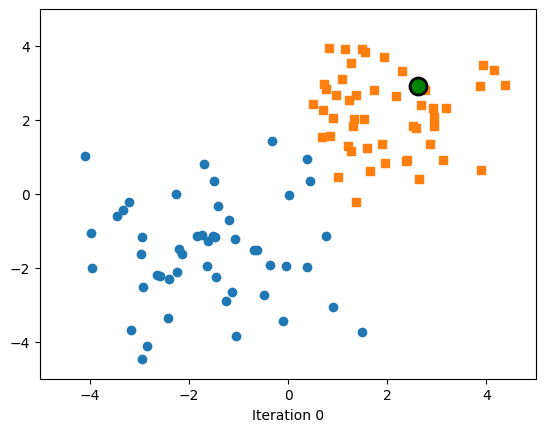

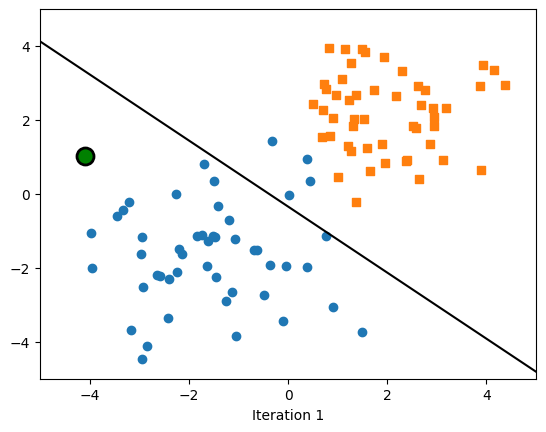

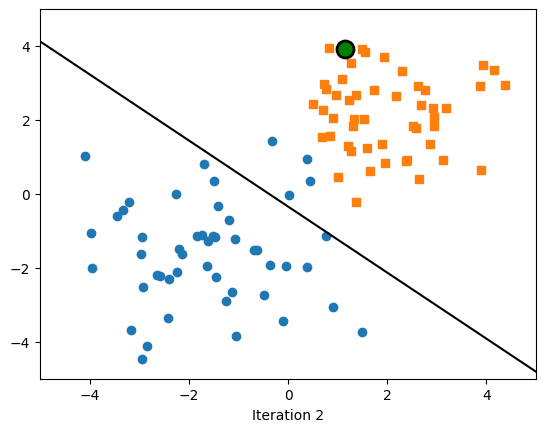

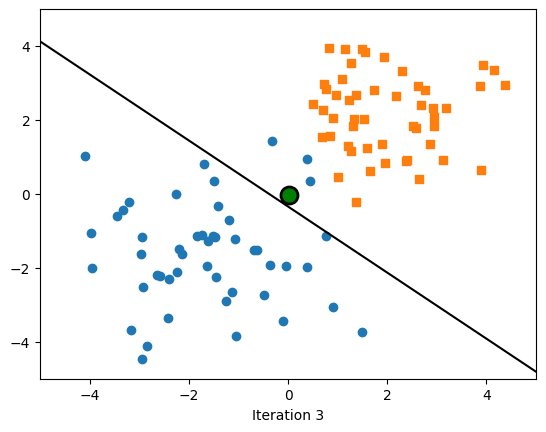

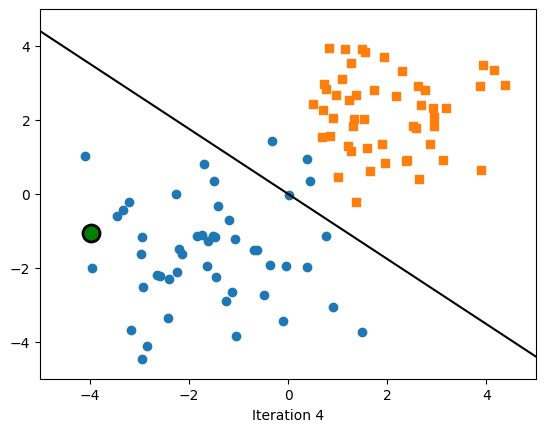

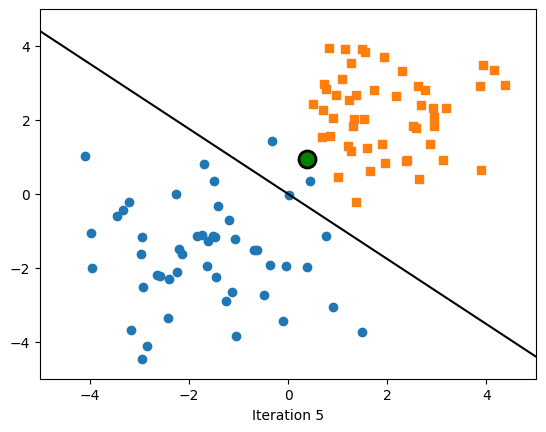

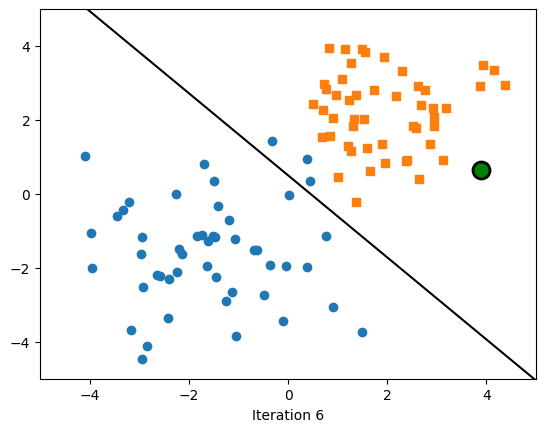

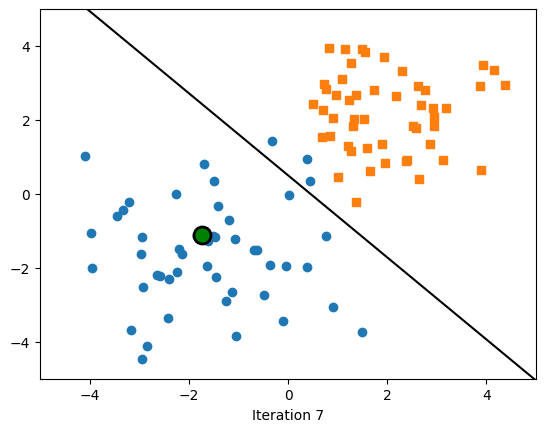

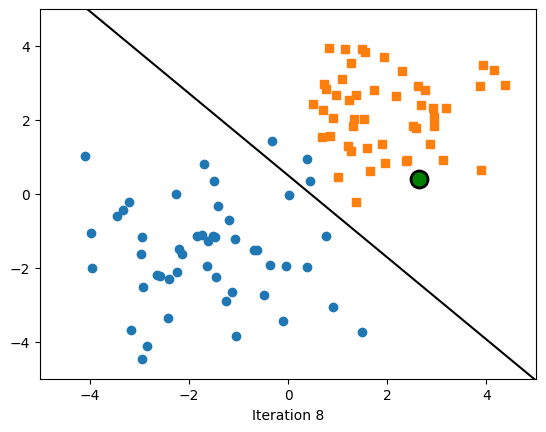

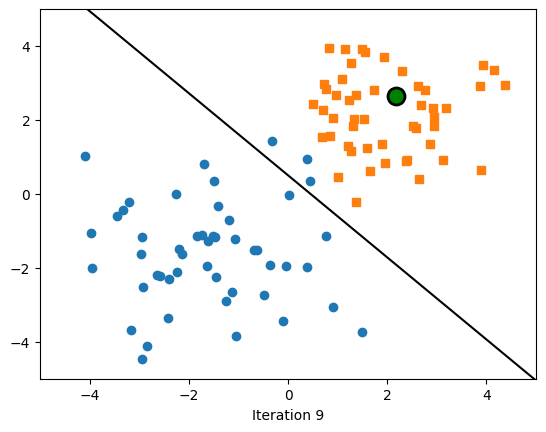

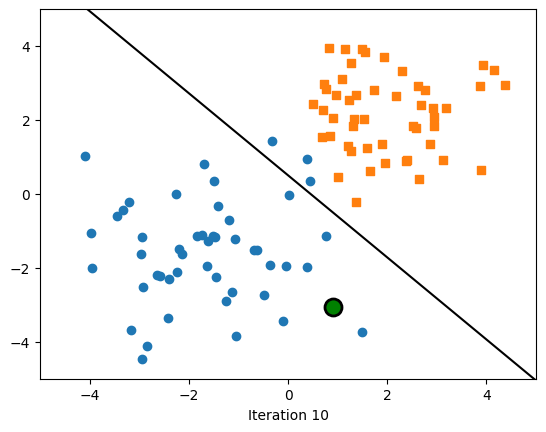

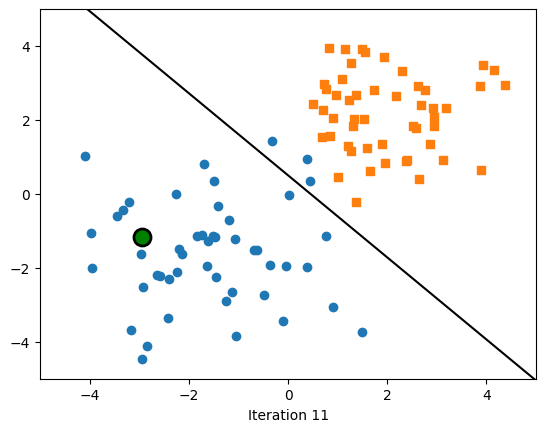

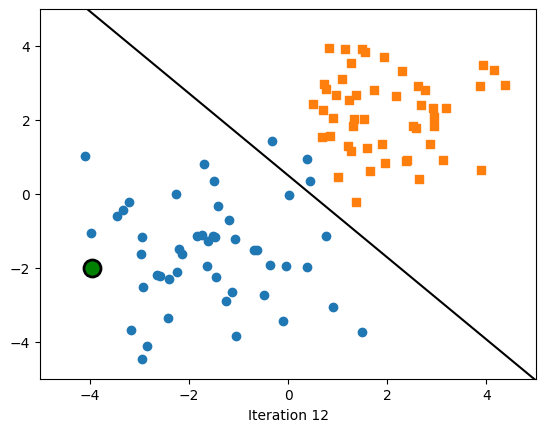

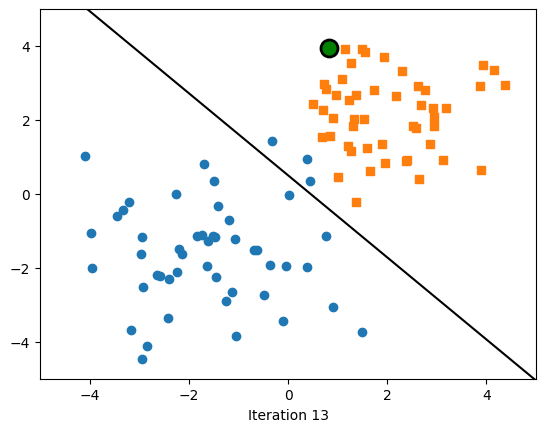

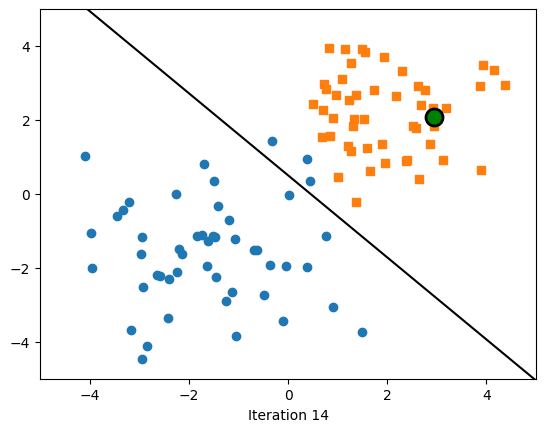

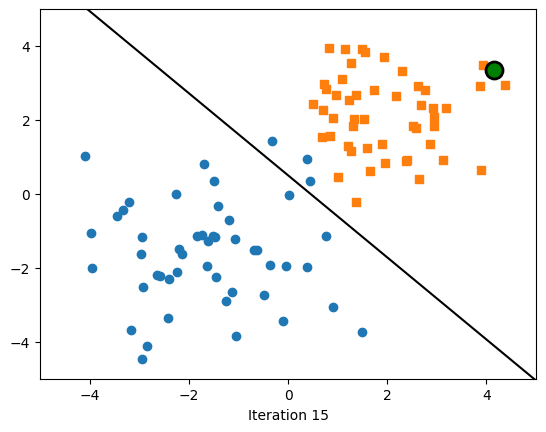

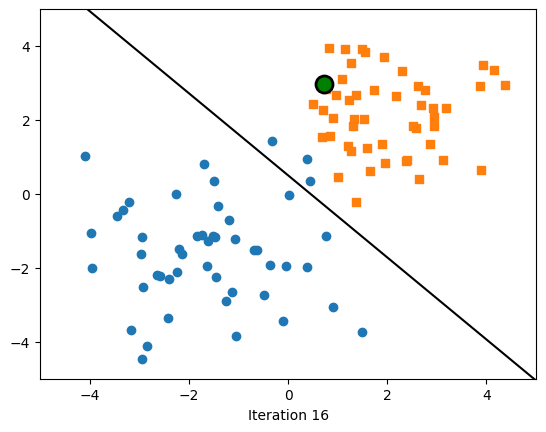

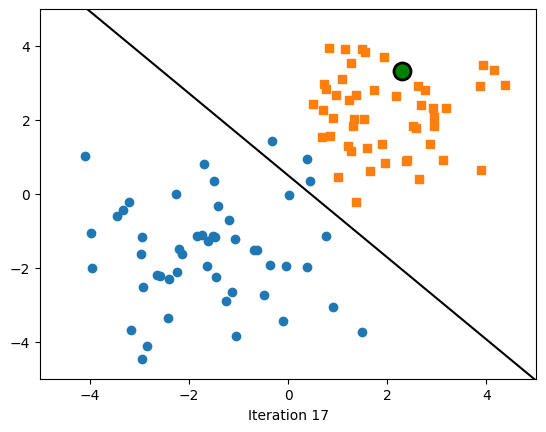

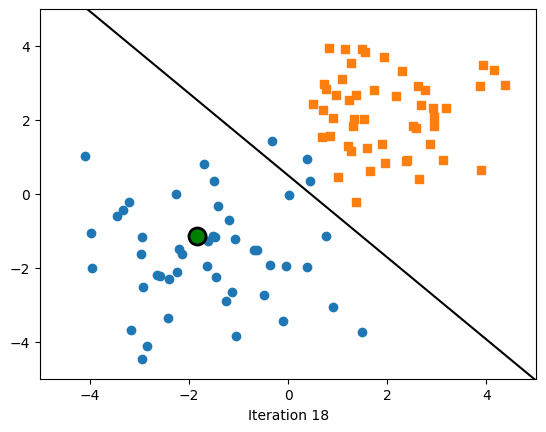

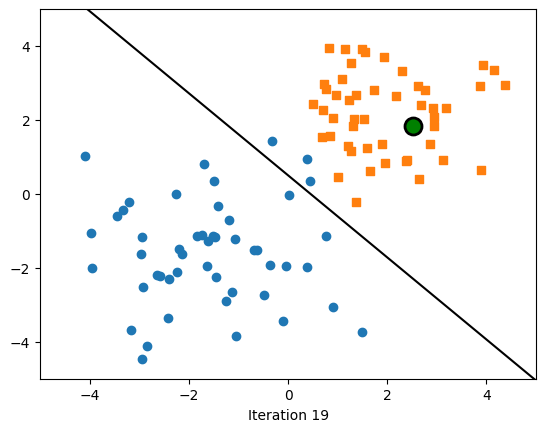

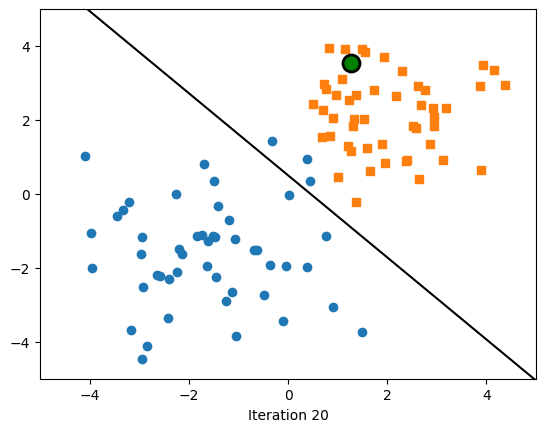

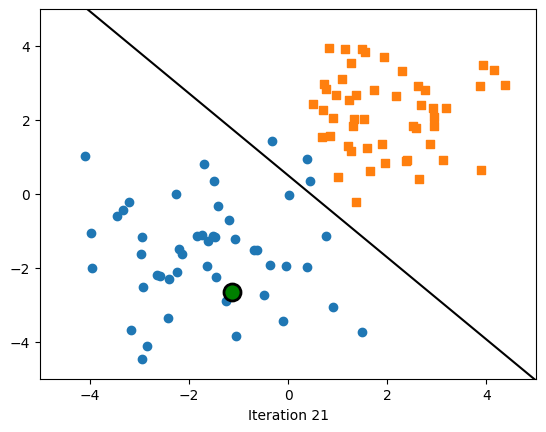

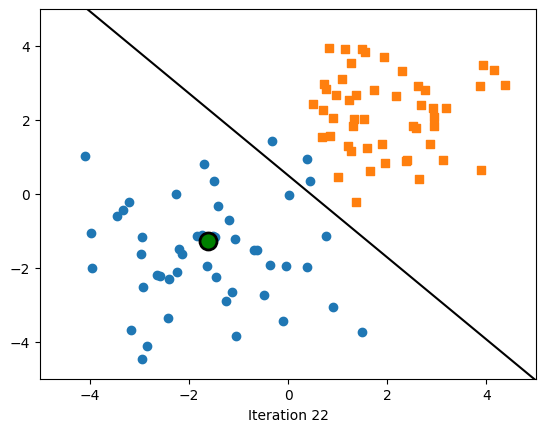

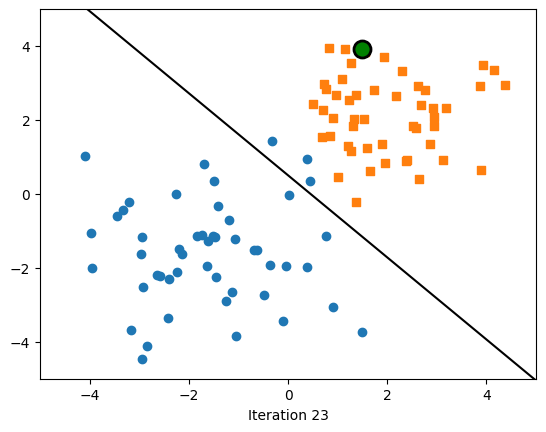

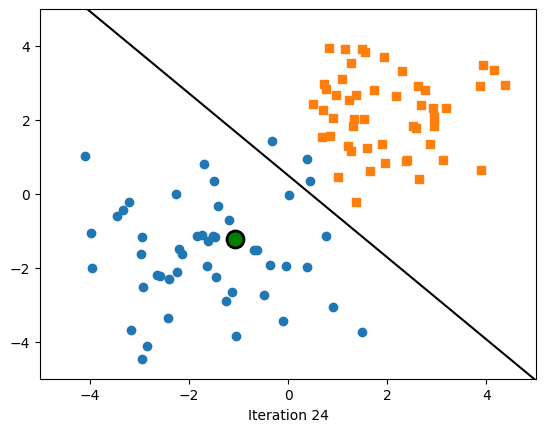

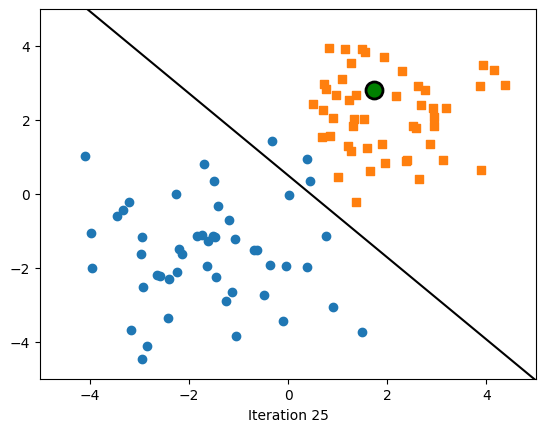

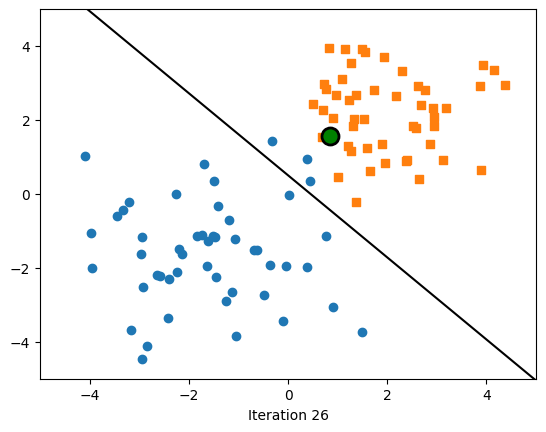

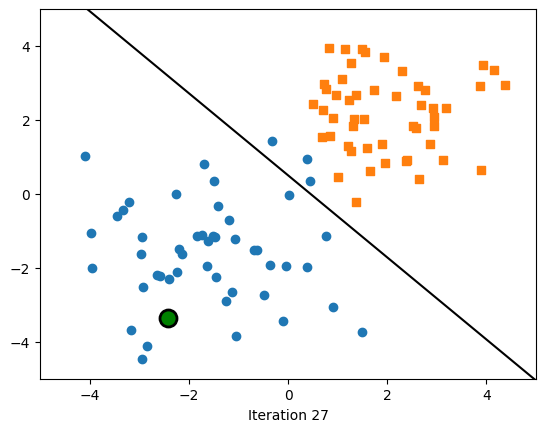

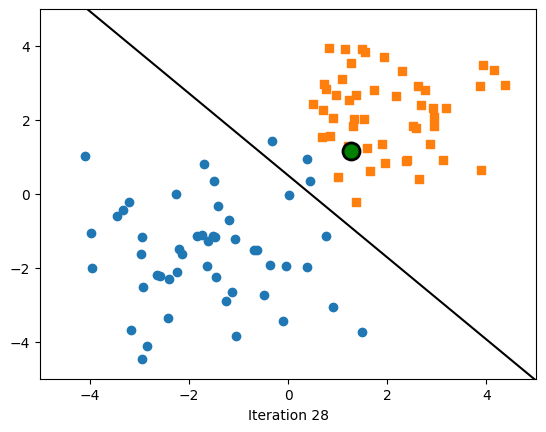

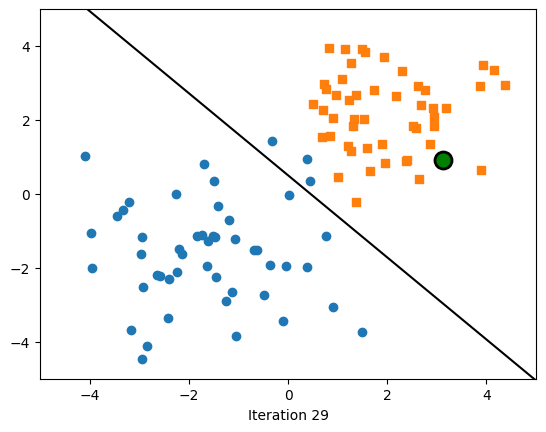

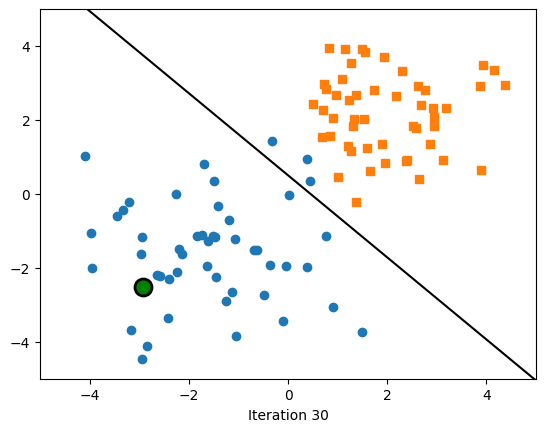

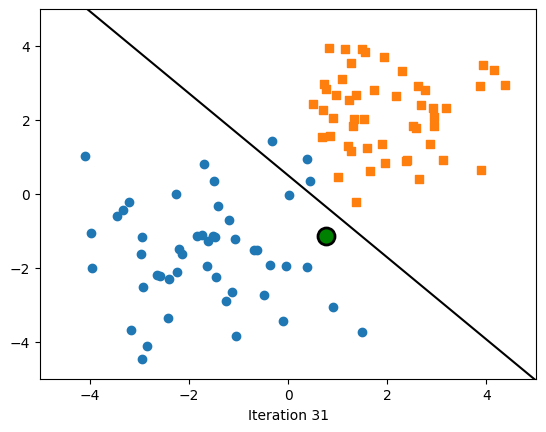

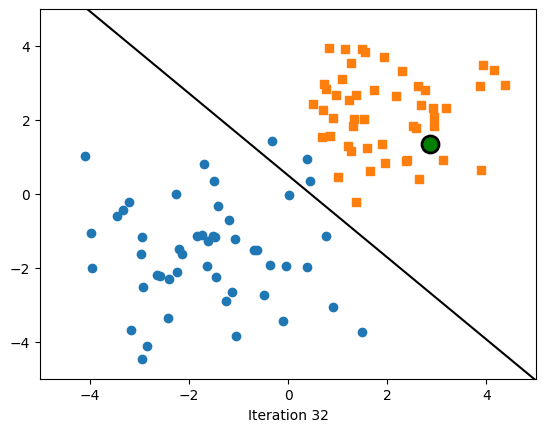

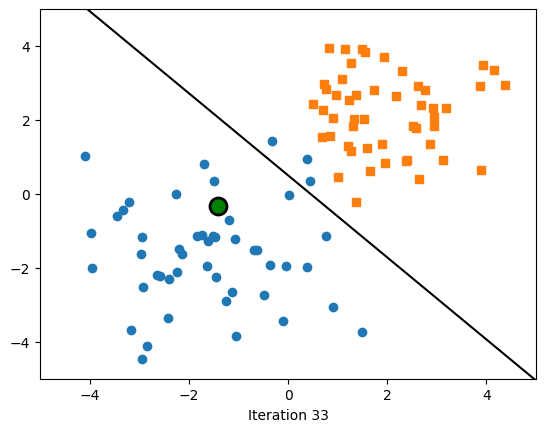

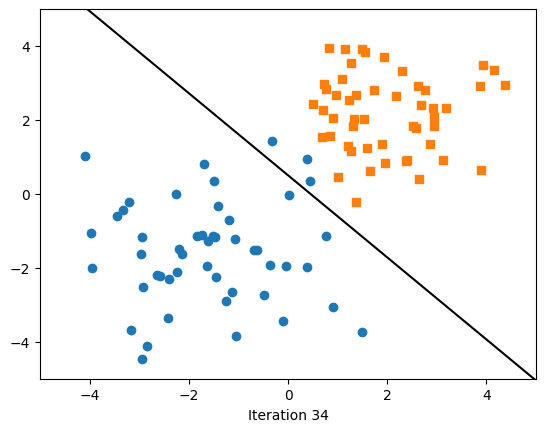

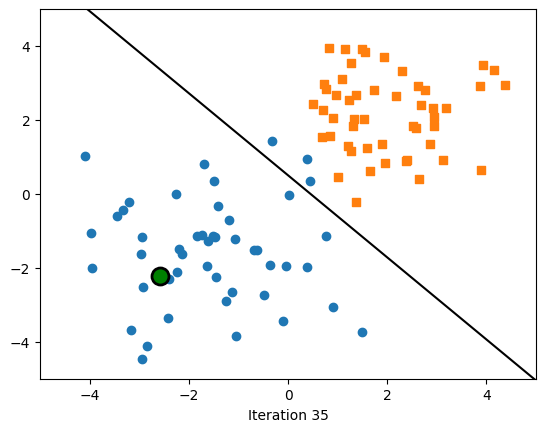

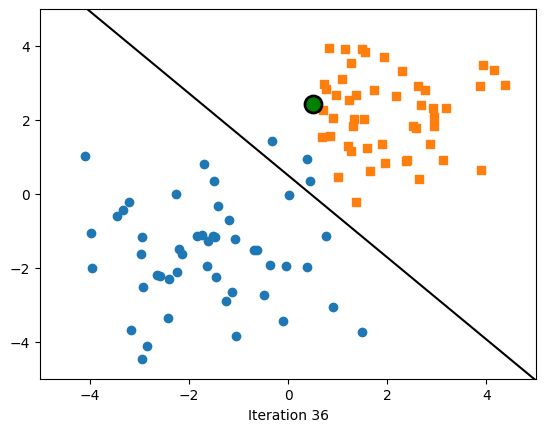

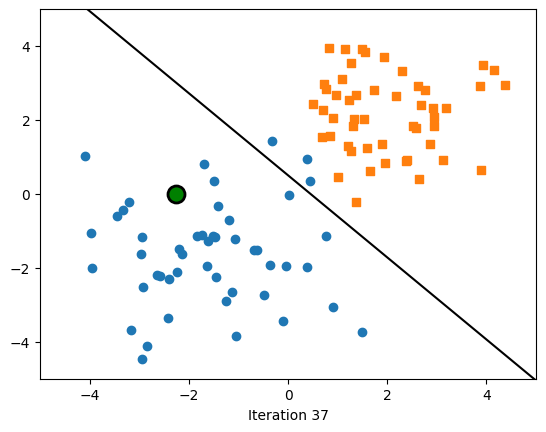

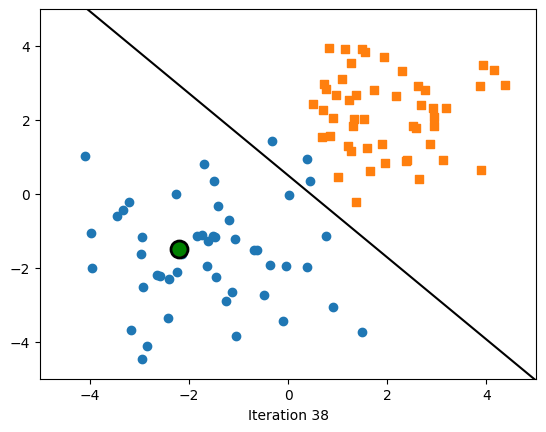

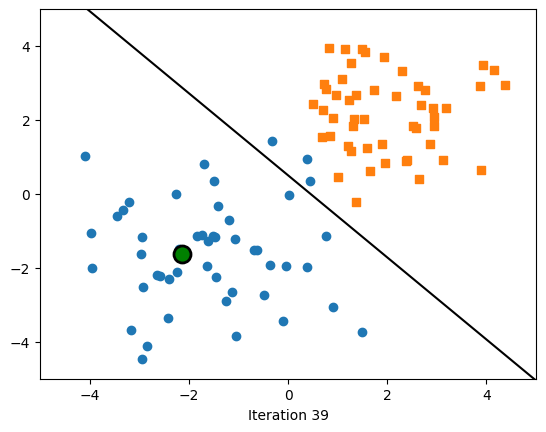

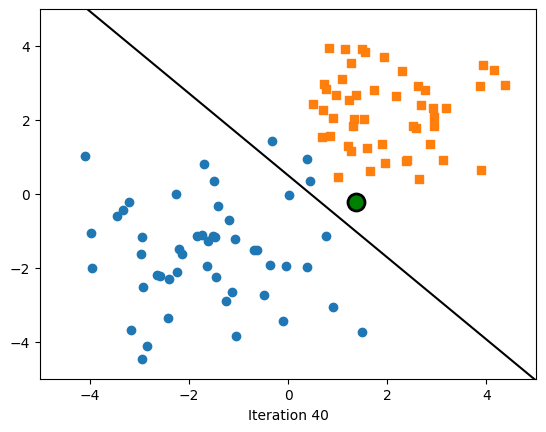

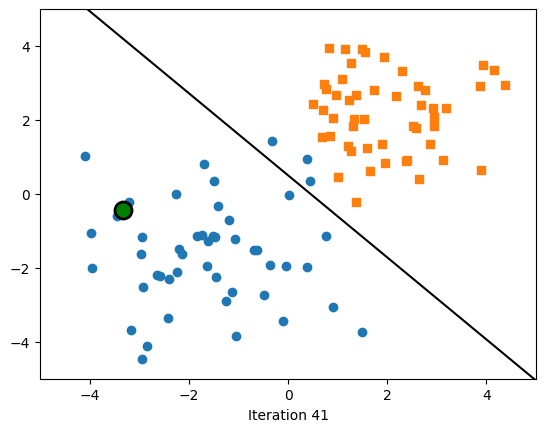

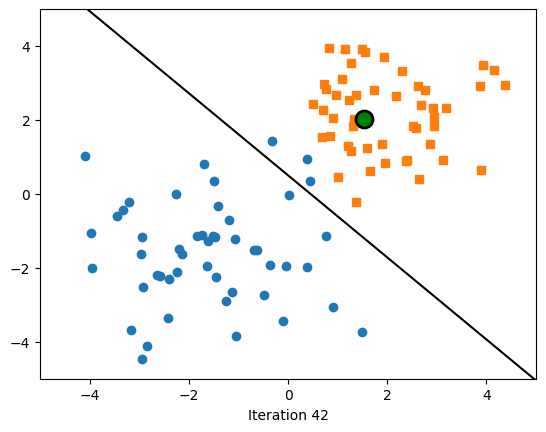

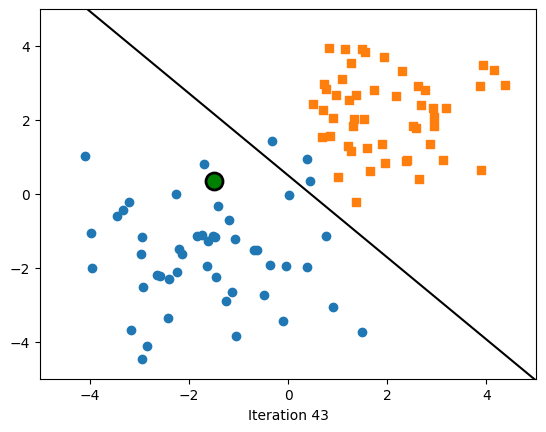

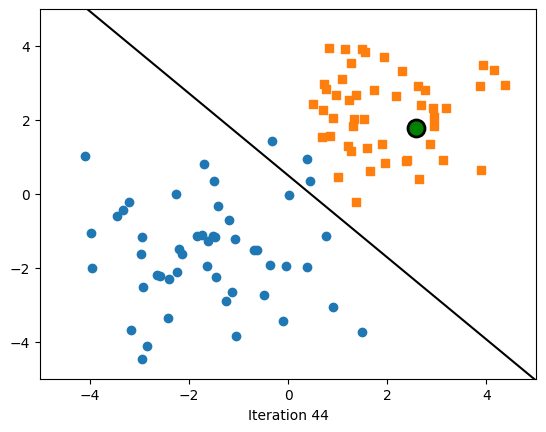

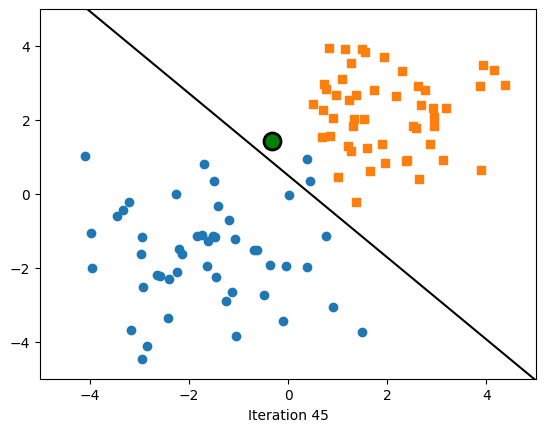

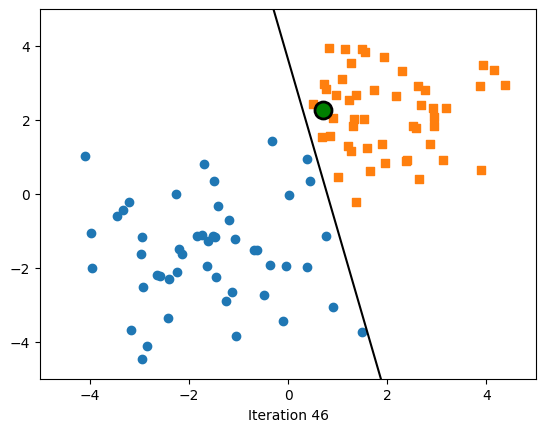

In [23]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.pyplot as plt
import numpy as np
import imageio

scatter_highlight_defaults = {'c': 'green',
                              'edgecolor': 'k',
                              'alpha': 1.0,
                              'linewidths': 2,
                              'marker': 'o',
                              's': 150}

def plot(i):
    fig, ax = plt.subplots()
    canvas = FigureCanvas(fig)

    w, b = all_weights[i], all_biases[i]

    x_min = -20
    x_max = 20

    ax.set_xlim([-5., 5])
    ax.set_ylim([-5., 5])
    ax.set_xlabel(f'Iteration {i}')

    if w[1] != 0:
        y_min = (-(w[0] * x_min) - b[0]) / w[1]
        y_max = (-(w[0] * x_max) - b[0]) / w[1]
        ax.plot([x_min, x_max], [y_min, y_max], color='k')
    else:
        x_val = -b[0] / w[0]
        ax.axvline(x=x_val, color='k')

    ax.scatter(x[y == 0, 0], x[y == 0, 1], label='class 0', marker='o')
    ax.scatter(x[y == 1, 0], x[y == 1, 1], label='class 1', marker='s')
    ax.scatter(x[i][0], x[i][1], **scatter_highlight_defaults)

    canvas.draw()
    image = np.frombuffer(canvas.buffer_rgba(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))

    return image

imageio.mimsave('training.gif', [plot(i) for i in range(len(all_weights))], fps=1)


In [26]:
print(all_weights[1])

[[2.61]
 [2.92]]
